# Proceso de EVA

In [1]:
#!pip install numpy==1.23 pandas==1.5.3   scikit-learn 1.5.2 y TensorFlow 2.12.0,

In [2]:
#!pip install scikit-learn==1.1.0 tensorflow==2.12.0

In [3]:
import re 
import pandas as pd
from fuzzywuzzy import process
import matplotlib.pyplot as plt

In [4]:
from wordcloud import WordCloud
import seaborn as sns

In [5]:
df = pd.read_excel('Prueba_EVA.xlsx')

df.head()

descripcion
0  Sony Turntable - PSLX350H/ Belt Drive System/ ...
1  Bose Acoustimass 5 Series III Speaker System -...
2  Sony Switcher - SBV40S/ Eliminates Disconnecti...
3  Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...
4  Bose 161 Bookshelf Speakers In White - 161WH/ ...

In [6]:
data = df.copy()

# Definición de funciones

In [7]:
def extract_brand(description, brand_list):
    """
    Extrae atributos de una descripción de producto mediante expresiones regulares.

    Args:
        description (str): Descripcion del produto.
        brand_list (list): Listas de marecas reconocidas.

    Returns:
        str: La marca detectada u "other" si no se encuentra ninguna marca.
    """
    if not description or pd.isna(description):
        return None

    # - `process.extractOne` toma la descripción y encuentra el elemento más similar en `brand_list`.
    # - Devuelve una tupla con la marca coincidente (`matched_brand`) y la puntuación (`score`) de similitud.
    # Dividir la descripción en palabras
    words = re.findall(r"\b\w+\b", description)

    # Iterar por cada palabra para encontrar la mejor coincidencia
    for word in words:
        matched_brand, score = process.extractOne(word, brand_list)
        if score > 80:
            return matched_brand

    # Si no se encuentra ninguna coincidencia adecuada
    return "other"

    # La marca si la puntuación es suficientemente alta, de lo contrario "other"
    return matched_brand if score > 80 else "other"


brands = [
    "Sony", "Samsung", "LG", "Apple", "Toshiba", "Bose", "Panasonic", "Canon", 
    "Nikon", "Dell", "HP", "Lenovo", "Sharp", "Philips", "GE", "Microsoft", 
    "Jabra", "Yamaha", "Onkyo", "Pioneer", "Kenwood", "Olympus", "Mac", "Garmin", "Logitech", "Whirlpool"
    ,"Linksys", "Mitsubishi", "KitchenAid", "Motorola", "Xiaomi", "Sennheiser", "Shure", "Sharp"
]

In [8]:
data["marca"] = data["descripcion"].apply(lambda x: extract_brand(x, brands))
data

descripcion       marca
0     Sony Turntable - PSLX350H/ Belt Drive System/ ...        Sony
1     Bose Acoustimass 5 Series III Speaker System -...        Bose
2     Sony Switcher - SBV40S/ Eliminates Disconnecti...        Sony
3     Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...        Sony
4     Bose 161 Bookshelf Speakers In White - 161WH/ ...        Bose
...                                                 ...         ...
1076  Logitech Cordless Desktop Wave Keyboard And Mo...    Logitech
1077  Mitsubishi DLP Black TV Stand - MBS73V/ Matchi...  Mitsubishi
1078  Logitech Digital Precision PC Gaming Headset -...    Logitech
1079  Logitech 2.1 Multimedia Silver Speaker System ...    Logitech
1080  Linksys Wireless-G Range Expander - WRE54G/ Su...     Linksys

[1081 rows x 2 columns]

In [9]:
def extract_price(description):
    """
    Extrae el precio de una descripción de producto utilizando expresiones regulares.

    Args:
        description (str): La descripción del producto.

    Returns:
        str: El precio detectado o None si no se encuentra.
    """
    # Buscar patrones de precios como "$99" o "$ 1235"
    price_match = re.search(r"\$\s?(\d+(?:,\d{3})*(?:\.\d{1,2})?)", description)
    if price_match:
        return price_match.group(1).strip()
    return None

In [10]:
data["precio"] = data["descripcion"].apply(lambda x: extract_price(x))

data

descripcion       marca precio
0     Sony Turntable - PSLX350H/ Belt Drive System/ ...        Sony   None
1     Bose Acoustimass 5 Series III Speaker System -...        Bose    399
2     Sony Switcher - SBV40S/ Eliminates Disconnecti...        Sony     49
3     Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...        Sony   None
4     Bose 161 Bookshelf Speakers In White - 161WH/ ...        Bose    158
...                                                 ...         ...    ...
1076  Logitech Cordless Desktop Wave Keyboard And Mo...    Logitech     79
1077  Mitsubishi DLP Black TV Stand - MBS73V/ Matchi...  Mitsubishi    549
1078  Logitech Digital Precision PC Gaming Headset -...    Logitech     49
1079  Logitech 2.1 Multimedia Silver Speaker System ...    Logitech   None
1080  Linksys Wireless-G Range Expander - WRE54G/ Su...     Linksys     99

[1081 rows x 3 columns]

In [11]:
def extract_watts(description):
    """
    Extrae la potencia en watts de una descripción de producto utilizando expresiones regulares.

    Args:
        description (str): La descripción del producto.

    Returns:
        str: La potencia detectada o None si no se encuentra.
    """
    # Buscar patrones como "500 Watts", "100W", "12Watts", "5 W", "5 Wats"
    watts_match = re.search(r"\b(\d+)\s*(W(?:atts)?|Wats)\b", description, re.IGNORECASE)
    if watts_match:
        return watts_match.group(1).strip()
    return None

In [12]:
data["watts"] = data["descripcion"].apply(lambda x: extract_watts(x))

data

descripcion       marca precio  \
0     Sony Turntable - PSLX350H/ Belt Drive System/ ...        Sony   None   
1     Bose Acoustimass 5 Series III Speaker System -...        Bose    399   
2     Sony Switcher - SBV40S/ Eliminates Disconnecti...        Sony     49   
3     Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...        Sony   None   
4     Bose 161 Bookshelf Speakers In White - 161WH/ ...        Bose    158   
...                                                 ...         ...    ...   
1076  Logitech Cordless Desktop Wave Keyboard And Mo...    Logitech     79   
1077  Mitsubishi DLP Black TV Stand - MBS73V/ Matchi...  Mitsubishi    549   
1078  Logitech Digital Precision PC Gaming Headset -...    Logitech     49   
1079  Logitech 2.1 Multimedia Silver Speaker System ...    Logitech   None   
1080  Linksys Wireless-G Range Expander - WRE54G/ Su...     Linksys     99   

     watts  
0     None  
1      200  
2     None  
3     None  
4     None  
...    ...  
1076  None  
1077  None  
1078  None  
1079   200  
1080  None  

[1081 rows x 4 columns]

In [13]:
def extract_gb(description):
    """
    Extrae la capacidad en GB de una descripción de producto utilizando expresiones regulares.

    Args:
        description (str): La descripción del producto.

    Returns:
        str: La capacidad en GB detectada o None si no se encuentra.
    """
    # Buscar patrones como "32GB", "128GB", "64 GB", "4.7 GB"
    gb_match = re.search(r"\b(\d+(?:\.\d+)?)\s*GB\b", description, re.IGNORECASE)
    if gb_match:
        return gb_match.group(1).strip()
    return None

In [14]:
data["GB"] = data["descripcion"].apply(lambda x: extract_gb(x))

data

descripcion       marca precio  \
0     Sony Turntable - PSLX350H/ Belt Drive System/ ...        Sony   None   
1     Bose Acoustimass 5 Series III Speaker System -...        Bose    399   
2     Sony Switcher - SBV40S/ Eliminates Disconnecti...        Sony     49   
3     Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...        Sony   None   
4     Bose 161 Bookshelf Speakers In White - 161WH/ ...        Bose    158   
...                                                 ...         ...    ...   
1076  Logitech Cordless Desktop Wave Keyboard And Mo...    Logitech     79   
1077  Mitsubishi DLP Black TV Stand - MBS73V/ Matchi...  Mitsubishi    549   
1078  Logitech Digital Precision PC Gaming Headset -...    Logitech     49   
1079  Logitech 2.1 Multimedia Silver Speaker System ...    Logitech   None   
1080  Linksys Wireless-G Range Expander - WRE54G/ Su...     Linksys     99   

     watts    GB  
0     None  None  
1      200  None  
2     None  None  
3     None  None  
4     None  None  
...    ...   ...  
1076  None  None  
1077  None  None  
1078  None  None  
1079   200  None  
1080  None  None  

[1081 rows x 5 columns]

In [15]:
data[data['GB'].notnull()]

descripcion      marca  precio  \
58    Panasonic 5-Pack DVD-RAM Discs - LMAF120LU5/ S...  Panasonic      15   
88    Sony DVD-R Recordable Camcorder Media 3 Pack -...       Sony    9.99   
233   Transcend 2GB Micro SD Secure Digital Memory C...  Microsoft    None   
260   Sony MS-A1GD 1GB Memory Stick Micro (M2) - MSA...       Sony    None   
311   Apple Mac Mini 1.83GHz Intel Core 2 Duo Comput...      Apple     599   
...                                                 ...        ...     ...   
1050  Panasonic Yellow 4GB SDHC Memory Card - RPSDV0...  Panasonic    None   
1055  Sony VAIO FW Series Black Notebook Computer - ...       Sony    None   
1065  Nokia T-Mobile Unlocked Cellular Phone - N96/ ...    Toshiba  599.00   
1069  Transcend JetFlash V10 16GB USB Flash Drive - ...    Toshiba      38   
1071  Panasonic LM-AF30U3 Three Pack Of Single-Sided...  Panasonic    8.99   

     watts   GB  
58    None  4.7  
88    None  1.4  
233   None    2  
260   None    1  
311   None    1  
...    ...  ...  
1050  None    4  
1055  None  320  
1065  None   16  
1069  None   16  
1071  None  1.4  

[91 rows x 5 columns]

In [16]:
def extract_sku(description):
    """
    Extrae el SKU (ID único) de una descripción de producto utilizando expresiones regulares.

    Args:
        description (str): La descripción del producto.

    Returns:
        str: El SKU detectado o None si no se encuentra.
    """
    # Buscar cadenas alfanuméricas que comiencen con 1-4 letras seguidas de 1-4 números
    sku_match = re.search(r"\b[a-zA-Z]{1,4}\d{1,4}\b", description)
    if sku_match and len(sku_match.group(0)) > 4:
        return sku_match.group(0).strip()
    return None

In [17]:
data["sku"] = data["descripcion"].apply(lambda x: extract_sku(x))
data

descripcion       marca precio  \
0     Sony Turntable - PSLX350H/ Belt Drive System/ ...        Sony   None   
1     Bose Acoustimass 5 Series III Speaker System -...        Bose    399   
2     Sony Switcher - SBV40S/ Eliminates Disconnecti...        Sony     49   
3     Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...        Sony   None   
4     Bose 161 Bookshelf Speakers In White - 161WH/ ...        Bose    158   
...                                                 ...         ...    ...   
1076  Logitech Cordless Desktop Wave Keyboard And Mo...    Logitech     79   
1077  Mitsubishi DLP Black TV Stand - MBS73V/ Matchi...  Mitsubishi    549   
1078  Logitech Digital Precision PC Gaming Headset -...    Logitech     49   
1079  Logitech 2.1 Multimedia Silver Speaker System ...    Logitech   None   
1080  Linksys Wireless-G Range Expander - WRE54G/ Su...     Linksys     99   

     watts    GB    sku  
0     None  None   None  
1      200  None   None  
2     None  None   None  
3     None  None   None  
4     None  None   None  
...    ...   ...    ...  
1076  None  None   None  
1077  None  None   None  
1078  None  None   None  
1079   200  None  Z2300  
1080  None  None   None  

[1081 rows x 6 columns]

In [18]:
data[data["sku"].notnull()]

descripcion      marca precio  \
7     Panasonic Yeast Pro Automatic Breadmaker - SDY...  Panasonic   None   
8     Sony Vertical-In-The-Ear Stereo Headphones - M...       Sony   None   
18    Cuisinart Cordless Electric Kettle - KUA17/ 1-...         GE     70   
25    Panasonic Laser Toner Cartridge - KXFA83/ Used...  Panasonic   None   
35    Kenwood 6-Disc CD Changer - KDCC669/ 3-Angle M...    Kenwood    129   
...                                                 ...        ...    ...   
1063  Cuisinart Exact Heat Matte Black Toaster Oven ...  Microsoft    139   
1070  Logitech V-UBM46 QuickCam Pro 9000 Black Webca...   Logitech   None   
1072  Lasonic ATSC Digital To Analog TV Converter Bo...    Toshiba   None   
1073  Case Logic Black In-Car DVD Player Case - PDVK...     Garmin     29   
1079  Logitech 2.1 Multimedia Silver Speaker System ...   Logitech   None   

     watts    GB      sku  
7     None  None  SDYD250  
8     None  None   MDRJ10  
18    None  None    KUA17  
25    None  None   KXFA83  
35    None  None  KDCC669  
...    ...   ...      ...  
1063  None  None   TOB155  
1070  None  None    UBM46  
1072  None  None   LTA260  
1073  None  None   PDVK10  
1079   200  None    Z2300  

[206 rows x 6 columns]

In [19]:
# Diccionario de tipos de productos
tipos = {
    "television": ["TV", "Televisor", "Smart TV", "Pantalla", "television"],
    "audifonos": ["Auriculares", "Headphones", "Audífonos inalámbricos","audifonos","Headset"],
    "teatro_casa": ["Home Theater", "Sistema de sonido", "Teatro en casa"],
    "speaker": ["Altavoz", "Bocina", "Parlante", "Speaker"],
    "notebook": ["Laptop", "Computadora portátil", "Notebook", "Computadora portatil"],
    "manos_libres": ["Auriculares Bluetooth", "Manos libres", "Earbuds"],
    "telefono": ["Teléfono fijo", "Línea fija", "Teléfono","Telefono fijo", "Linea fija", "Telefono"],
    "smartphone": ["Celular", "Teléfono inteligente", "Smartphone", "Telefono inteligente",  "Telefono movil"],
    "tablet": ["iPad", "Tablet", "Tableta electrónica","Tableta electrónica"],
    "smartwatch": ["Reloj inteligente", "Smartwatch", "Wearable"],
    "camara_digital": ["Cámara", "Cámara compacta", "Digital Camera","Camara", "Camara compacta", "Camera"],
    "dron": ["Drone", "Quadcopter", "Aeronave no tripulada"],
    "bocina_inteligente": ["Altavoz inteligente", "Smart Speaker", "Bocina con asistente"],
    "proyector": ["Proyector", "Proyector HD", "Proyector de video"],
    "blu_ray": ["Reproductor Blu-ray", "Blu-ray player", "Reproductor HD"],
    "monitor": ["Pantalla", "Monitor LED", "Monitor de computadora"],
    "router": ["Router Wi-Fi", "Router inalámbrico", "Wi-Fi Router"],
    "consola": ["Consola de videojuegos", "Videojuegos", "Gaming Console", "Xbox", "play station", "nintendo"],
    "smart_hub": ["Hub inteligente", "Smart Hub", "Centro domótico"],
    "cargador": ["Power Bank", "Cargador portátil", "Bateria externa"],
    "barra_sonido": ["Soundbar", "Barra de sonido", "Altavoz horizontal"],
    "control_remoto": ["Control remoto", "Universal Remote", "Control IR"],
    "camara_seguridad": ["Cámara de seguridad", "CCTV", "Cámara IP"],
    "disco_duro": ["HDD", "SSD", "Disco duro externo"],
    "impresora": ["Multifuncional", "Impresora", "Impresora 3D"],
    "escaner": ["Escáner", "Escáner portátil", "Scanner"],
    "repetidor": ["Extensor Wi-Fi", "Repetidor", "Wi-Fi Booster"],
    "mouse": ["Ratón", "Mouse", "Mouse inalámbrico"],
    "teclado": ["Teclado", "Teclado mecánico", "Teclado mecanico", "Keyboard"],
    "tv_box": ["Android TV", "Apple TV", "Roku", "Fire Stick"],
    "auriculares": ["Auriculares", "Noise Cancelling", "Auriculares Bluetooth"],
    "microondas": ["Horno de microondas", "Microondas inteligente", "Microwave", "Microwave"],
    "refrigerador": ["Refrigerador inteligente", "Smart Fridge", "Refrigerador"],
    "purificador": ["Purificador de aire", "Air Purifier", "Purificador inteligente"],
    "termostato": ["Termostato", "Smart Thermostat", "Climatizador"],
    "luces": ["Focos inteligentes", "Smart Bulbs", "Luces LED inteligentes"],
    "enchufe": ["Smart Plug", "Enchufe inteligente", "Tomacorriente inteligente"],
    "altavoz_agua": ["Altavoz resistente al agua", "Bocina waterproof", "Parlante impermeable"],
    "camara_accion": ["GoPro", "Cámara deportiva", "Action Camera"],
    "gafas_vr": ["Gafas VR", "Lentes de realidad virtual", "Virtual Reality"],
    "control_videojuegos": ["Gamepad", "Controlador", "Joystick"],
    "modem": ["Modem", "Router/Modem", "Modem de alta velocidad", "Router"],
    "bascula": ["Báscula", "Smart Scale", "Báscula inteligente"],
    "cepillo": ["Cepillo eléctrico", "Cepillo dental", "Cepillo inteligente"],
    "reloj": ["Despertador", "Reloj despertador", "Smart Clock"],
    "hoverboard": ["Hoverboard", "Scooter eléctrico", "Monopatín eléctrico","Scooter electrico", "Monopatín electrico"],
    "bicicleta": ["Bicicleta eléctrica", "E-bike", "Bicicleta con motor"],
    "camara_web": ["Webcam", "Cámara web", "Cámara para streaming"],
    "cortadora": ["Cortadora de cabello", "Máquina de cortar pelo", "Trimmer"],
    "tiras_led": ["Luces LED", "Tiras LED inteligentes", "Tiras de luz"],
    "adaptador_usb": ["Hub USB-C", "Adaptador USB-C", "Docking Station"],
    "microfono": ["Micrófono", "Micrófono de estudio", "Micrófono condensador"],
    "convertidor_streaming": ["Streaming Box", "Convertidor de streaming", "Media Box"],
    "radio": ["Radio", "Radio FM", "Radio digital"],
    "sistema_karaoke": ["Karaoke", "Sistema de karaoke", "Karaoke portátil"],
    "control_clima": ["Control de clima", "Climatizador inteligente", "Thermostat Remote"],
    "usb": ["USB", "Flash Drive", "memoria usb", "flash"],
    "horno": ["Oven"],
    "washer": ["washer", "dishwasher"],
    "control_remoto": ["ControlRemote","Control Remote", "Control Remoto", "Control", "IR/RF", "RF"],
    "bateria": ["Battery", "bateria"],
    "software": ["software", "licencia", "licence"],
    "secadora": ["Electric Dryer", "Dryer", "secadora"],
    "Switch": ["Switcher", "Switch"],
    "Reproductor": [ "player"],
    "extensor": ["Expander", "extensor"],
    "carcasa": ["case"]
}

In [20]:
def extract_type_from_dict(description,datas):
    """
    Extrae el tipo de producto de una descripción utilizando un diccionario .

    Args:
        description (str): La descripción del producto.
        datas (dict): Diccionario de tipos simplificados y variantes
    Returns:
        str: La clave del tipo de producto detectado o None si no se encuentra.
    """


    # Iterar sobre los tipos para buscar coincidencias
    for tipo, keywords in datas.items():
        for keyword in keywords:
            if re.search(rf"\b{re.escape(keyword)}\b", description, re.IGNORECASE):
                return tipo

    # Si no se encuentra ningún tipo conocido
    return None

In [21]:
data["tipo"] = data["descripcion"].apply(lambda x: extract_type_from_dict(x,tipos))
data

descripcion       marca precio  \
0     Sony Turntable - PSLX350H/ Belt Drive System/ ...        Sony   None   
1     Bose Acoustimass 5 Series III Speaker System -...        Bose    399   
2     Sony Switcher - SBV40S/ Eliminates Disconnecti...        Sony     49   
3     Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...        Sony   None   
4     Bose 161 Bookshelf Speakers In White - 161WH/ ...        Bose    158   
...                                                 ...         ...    ...   
1076  Logitech Cordless Desktop Wave Keyboard And Mo...    Logitech     79   
1077  Mitsubishi DLP Black TV Stand - MBS73V/ Matchi...  Mitsubishi    549   
1078  Logitech Digital Precision PC Gaming Headset -...    Logitech     49   
1079  Logitech 2.1 Multimedia Silver Speaker System ...    Logitech   None   
1080  Linksys Wireless-G Range Expander - WRE54G/ Su...     Linksys     99   

     watts    GB    sku            tipo  
0     None  None   None  control_remoto  
1      200  None   None         speaker  
2     None  None   None          Switch  
3     None  None   None  control_remoto  
4     None  None   None         speaker  
...    ...   ...    ...             ...  
1076  None  None   None           mouse  
1077  None  None   None      television  
1078  None  None   None       audifonos  
1079   200  None  Z2300         speaker  
1080  None  None   None        extensor  

[1081 rows x 7 columns]

In [22]:
data[data["tipo"].notnull()]

descripcion       marca precio  \
0     Sony Turntable - PSLX350H/ Belt Drive System/ ...        Sony   None   
1     Bose Acoustimass 5 Series III Speaker System -...        Bose    399   
2     Sony Switcher - SBV40S/ Eliminates Disconnecti...        Sony     49   
3     Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...        Sony   None   
4     Bose 161 Bookshelf Speakers In White - 161WH/ ...        Bose    158   
...                                                 ...         ...    ...   
1076  Logitech Cordless Desktop Wave Keyboard And Mo...    Logitech     79   
1077  Mitsubishi DLP Black TV Stand - MBS73V/ Matchi...  Mitsubishi    549   
1078  Logitech Digital Precision PC Gaming Headset -...    Logitech     49   
1079  Logitech 2.1 Multimedia Silver Speaker System ...    Logitech   None   
1080  Linksys Wireless-G Range Expander - WRE54G/ Su...     Linksys     99   

     watts    GB    sku            tipo  
0     None  None   None  control_remoto  
1      200  None   None         speaker  
2     None  None   None          Switch  
3     None  None   None  control_remoto  
4     None  None   None         speaker  
...    ...   ...    ...             ...  
1076  None  None   None           mouse  
1077  None  None   None      television  
1078  None  None   None       audifonos  
1079   200  None  Z2300         speaker  
1080  None  None   None        extensor  

[738 rows x 7 columns]

### Reodenamiento de las columnas

In [23]:
data = data[["marca","sku","tipo","precio","watts","GB", "descripcion"]]			

In [24]:
data[data["tipo"].isnull()]

marca      sku  tipo precio watts    GB  \
6     KitchenAid     None  None   None  None  None   
7      Panasonic  SDYD250  None   None  None  None   
9      Panasonic     None  None   None  None  None   
10     Panasonic     None  None     44  None  None   
11     Panasonic     None  None   None  None  None   
...          ...      ...   ...    ...   ...   ...   
1054   Microsoft     None  None   None  None  None   
1058   Microsoft     None  None     29  None  None   
1061       Canon     None  None   None  None  None   
1064     Toshiba     None  None   None  None  None   
1071   Panasonic     None  None   8.99  None   1.4   

                                            descripcion  
6     KitchenAid Pasta Roller And Cutter - KPRA/ One...  
7     Panasonic Yeast Pro Automatic Breadmaker - SDY...  
9     Panasonic 2-Line Integrated Telephone - KXTSC1...  
10    Panasonic Integrated Telephone System - KXTS10...  
11    Panasonic 2-Line Integrated Telephone System -...  
...                                                 ...  
1054  Griffin Black TuneBuds Mobile For iPod And iPh...  
1058  Belkin Leather Folio For 2G iPod Touch - F8Z37...  
1061  Canon XH A1S Black High Definition HDV Camcord...  
1064  Tripp-Lite Black 25 Foot SVGA HD15M To HD15M C...  
1071  Panasonic LM-AF30U3 Three Pack Of Single-Sided...  

[343 rows x 7 columns]

### Limpieza del texto  

esta función limpia el texto de la columna descripción para eliminar caracteres especiales


In [25]:
def clean_text(text:str) -> str:
        """
        Eliminar espacios en blanco adicionales, saltos de línea, tabulaciones y caracteres especiales
        Args:
        text (str): cadena donde se quiere suprimir los caracteres especiales

        Returns:
            str: cadena sin caracteres especiales
            
            Example:
            >>> texto = "Este es un texto  54. lkjkhdv : , con\nsaltos de línea                                                                          
            ...        Texto\tcon\ttabulaciones     
            ...    Texto con caracteres especiales\r\ny\b\fotros"

            >>> print(clean_text(texto))
            >>> Este es un texto  54. lkjkhdv : , con saltos de línea Texto con tabulaciones Texto con caracteres especiales y fotros
        """ 
        cleaned_text = re.sub(r'\s+|\n|\t|\r|\\|\b|\f|\||,|;', ' ', text)  # Reemplazar espacios en blanco, caracteres especiales y ',;'
        
        cleaned_text = cleaned_text.strip()  # Eliminar espacios en blanco al principio y al final
        
        # Dividir el texto en palabras separadas por espacios simples
        tokens = cleaned_text.split()
        
        # Unir los tokens en un solo texto con espacios entre palabras
        tokens_join = ' '.join(tokens)
        
        return tokens_join

In [26]:
data["descripcion"] = data["descripcion"].apply(lambda x: clean_text(x))
data["descripcion"] = data["descripcion"].apply(lambda x: clean_text(x))
data

marca    sku            tipo precio watts    GB  \
0           Sony   None  control_remoto   None  None  None   
1           Bose   None         speaker    399   200  None   
2           Sony   None          Switch     49  None  None   
3           Sony   None  control_remoto   None  None  None   
4           Bose   None         speaker    158  None  None   
...          ...    ...             ...    ...   ...   ...   
1076    Logitech   None           mouse     79  None  None   
1077  Mitsubishi   None      television    549  None  None   
1078    Logitech   None       audifonos     49  None  None   
1079    Logitech  Z2300         speaker   None   200  None   
1080     Linksys   None        extensor     99  None  None   

                                            descripcion  
0     Sony Turntable - PSLX350H / Belt Drive System ...  
1     Bose Acoustimass 5 Series III Speaker System -...  
2     Sony Switcher - SBV40S / Eliminates Disconnect...  
3     Sony 5 Disc CD Player - CDPCE375 / 5 Disc Chan...  
4     Bose 161 Bookshelf Speakers In White - 161WH /...  
...                                                 ...  
1076  Logitech Cordless Desktop Wave Keyboard And Mo...  
1077  Mitsubishi DLP Black TV Stand - MBS73V / Match...  
1078  Logitech Digital Precision PC Gaming Headset -...  
1079  Logitech 2 . 1 Multimedia Silver Speaker Syste...  
1080  Linksys Wireless - G Range Expander - WRE54G /...  

[1081 rows x 7 columns]

## Guardar datos transformados en un CSV

In [27]:
#data.to_csv("datos_limpios.csv", index = False)

In [28]:
# Exploración inicial del conjunto de datos
# Revisar tipos de datos y valores nulos
data_info = data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   marca        1081 non-null   object
 1   sku          206 non-null    object
 2   tipo         738 non-null    object
 3   precio       420 non-null    object
 4   watts        72 non-null     object
 5   GB           91 non-null     object
 6   descripcion  1081 non-null   object
dtypes: object(7)
memory usage: 59.2+ KB


In [29]:

# Resumen estadístico de columnas numéricas
numeric_summary = data.describe()


numeric_summary

marca    sku            tipo precio watts  GB  \
count   1081    206             738    420    72  91   
unique    33    179              29    168    39  16   
top     Sony  FX820  control_remoto     49   100   8   
freq     188      5             126     18     7  14   

                                              descripcion  
count                                                1081  
unique                                               1081  
top     Sony Turntable - PSLX350H / Belt Drive System ...  
freq                                                    1

In [30]:
# Revisar valores únicos por columna categórica
categorical_summary = data.select_dtypes(include='object').nunique()

categorical_summary

marca            33
sku             179
tipo             29
precio          168
watts            39
GB               16
descripcion    1081
dtype: int64

In [31]:
# Contar valores nulos en cada columna
null_values = data.isnull().sum()
null_values

marca             0
sku             875
tipo            343
precio          661
watts          1009
GB              990
descripcion       0
dtype: int64

## Marcas Populares

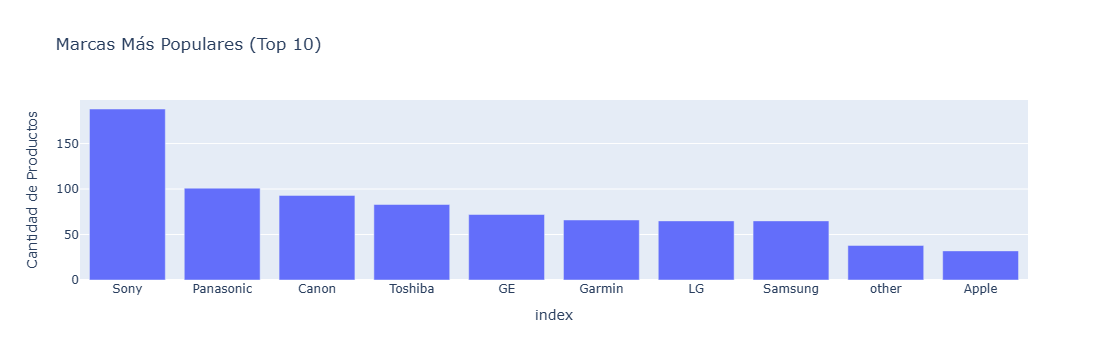

In [32]:
import plotly.express as px
marcas = data['marca'].dropna()
top_brands = marcas.value_counts().head(10)
# Marcas más populares
fig = px.bar(top_brands, 
             x=top_brands.index, 
             y=top_brands.values, 
             title='Marcas Más Populares (Top 10)', 
             labels={'x': 'Marca', 'y': 'Cantidad de Productos'})
fig.show()

## 1. Distribución de precios

<Figure size 1000x1200 with 0 Axes>

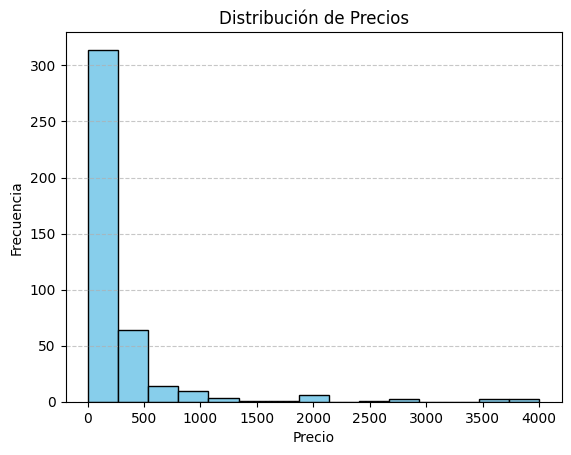

In [33]:
plt.figure(figsize=(10, 12))
data["precio"] = pd.to_numeric(data["precio"], errors='coerce')
# Filtrar los valores no nulos de la columna "precio"
precios = data["precio"].dropna()
plt.figure()
precios.plot(kind='hist', bins=15, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#plt.tight_layout()
#plt.savefig('distribucion_precios.png')
#plt.close()


1. **Distribución de Precios**: La mayoría de los precios se concentran en rangos más bajos, 
   pero se observan valores atípicos en rangos altos.

## 2. Productos por marca

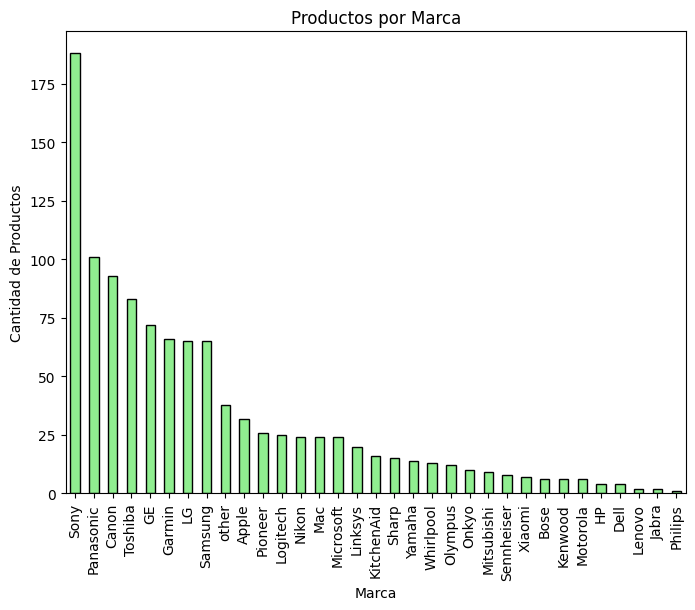

In [34]:
plt.figure(figsize=(8, 6))
data['marca'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Productos por Marca')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Productos')
plt.xticks(rotation=90)
plt.show()
#plt.tight_layout()
#plt.savefig('productos_por_marca.png')
#plt.close()

2. **Productos por Marca**: Algunas marcas dominan significativamente el catálogo, lo que podría 
   indicar preferencias de los clientes o mayor oferta de ciertos fabricantes.


## 3. Nube de palabras en descripciones

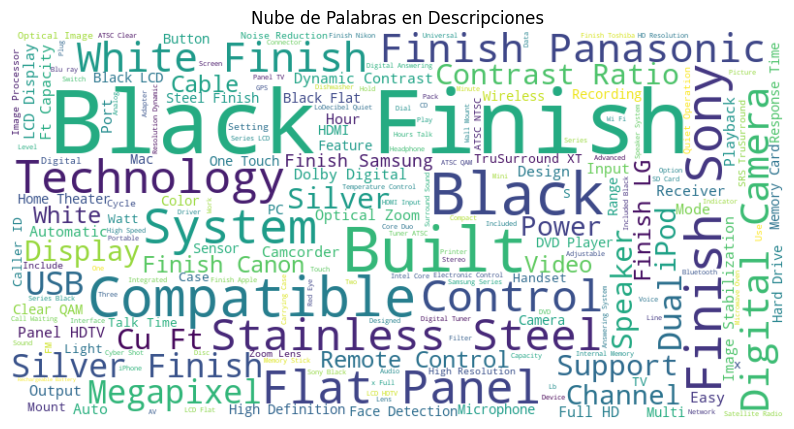

In [35]:
text = ' '.join(data['descripcion'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras en Descripciones')
plt.show()
#plt.tight_layout()
#plt.savefig('nube_de_palabras.png')
#plt.close()

3. **Nube de Palabras en Descripciones**: Las palabras más frecuentes sugieren los atributos 
   principales de los productos, como funcionalidades o componentes clave.


## 4. Comparativa por tipo de producto - Gráfico circular

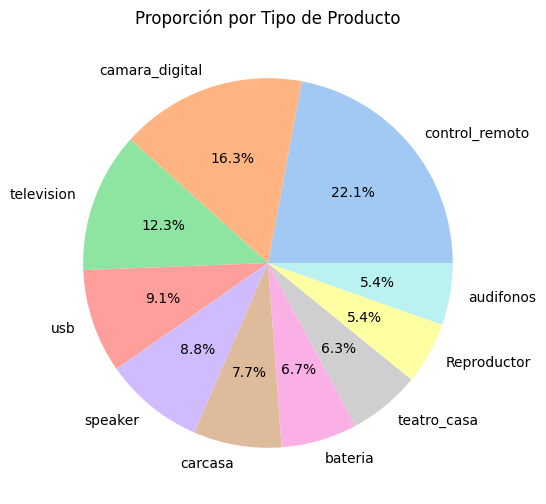

In [36]:
plt.figure(figsize=(8, 6))
data['tipo'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proporción por Tipo de Producto')
plt.ylabel('')  # Oculta el label del eje y
plt.show()
#plt.tight_layout()
#plt.savefig('proporcion_por_tipo.png')
#plt.close()

4. **Proporción por Tipo de Producto**: Los productos están distribuidos en varias categorías, 
   con ciertas categorías siendo más predominantes.


## 5. Comparativa de precios por tipo de producto - Boxplot

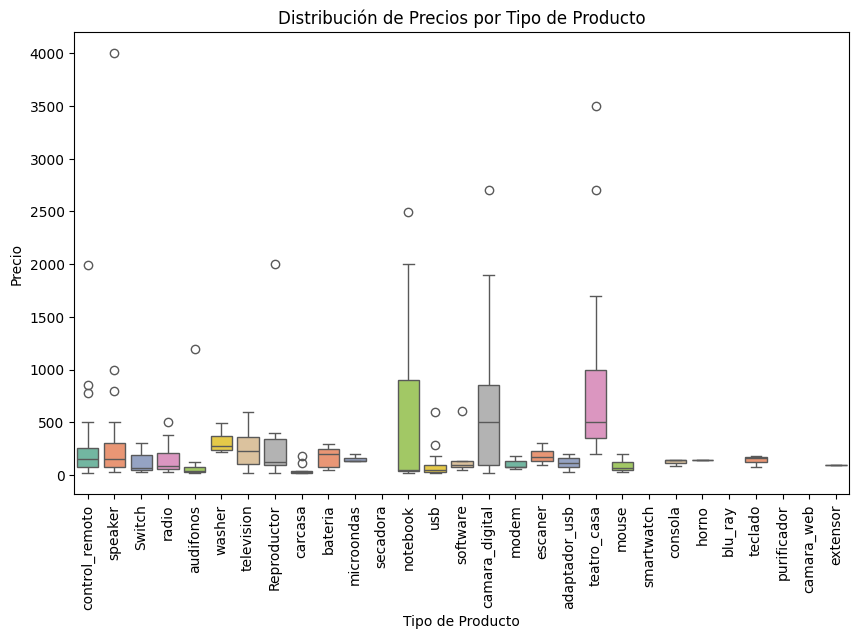

In [37]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='tipo', y='precio', palette='Set2',hue='tipo', dodge=False, legend=False)
plt.title('Distribución de Precios por Tipo de Producto')
plt.xlabel('Tipo de Producto')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()
#plt.tight_layout()
#plt.savefig('precios_por_tipo.png')
#plt.close()

5. **Distribución de Precios por Tipo de Producto**: Los precios varían considerablemente entre tipos de productos; 
   algunas categorías muestran más uniformidad en precios, mientras que otras tienen una dispersión amplia.


## 6. Relación entre precio y watts

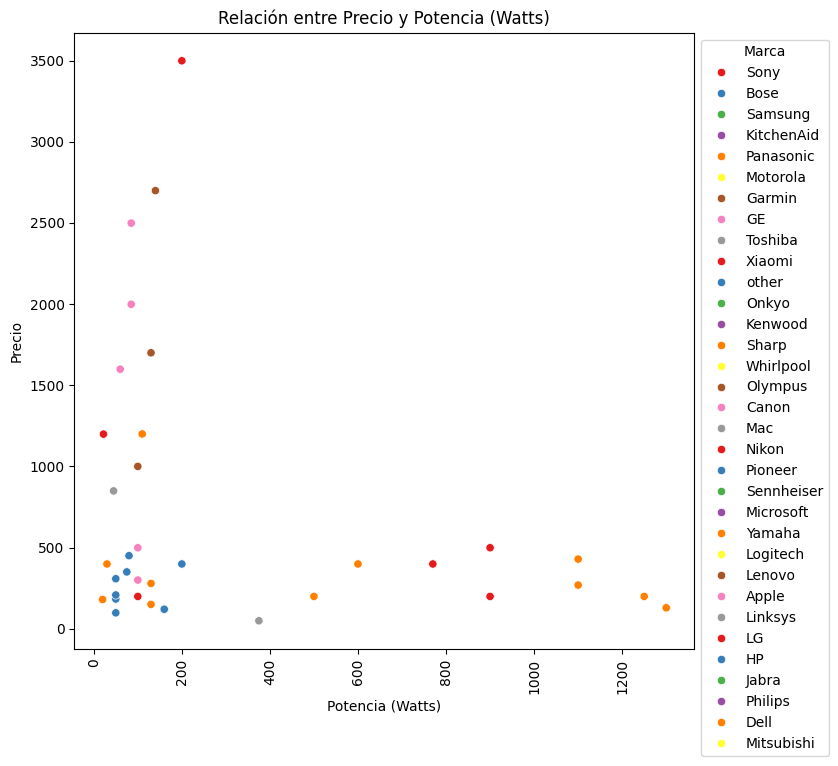

In [38]:
data_w = data.copy()
data_w["watts"] = pd.to_numeric(data_w["watts"], errors='coerce')
# Filtrar los valores no nulos de la columna "precio"
data_w["watts"].dropna()
plt.figure(figsize=(8, 8))
sns.scatterplot(data=data_w, x='watts', y='precio', hue='marca', palette='Set1')
plt.title('Relación entre Precio y Potencia (Watts)')
plt.xlabel('Potencia (Watts)')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.legend(title='Marca', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()
#plt.tight_layout()
#plt.savefig('precio_vs_watts.png')
#plt.close()


6. **Relación entre Precio y Potencia (Watts)**: Se observa una relación directa en algunos productos, 
   mientras que otros no presentan correlación clara.


## 7. Relación entre precio y capacidad (GB)

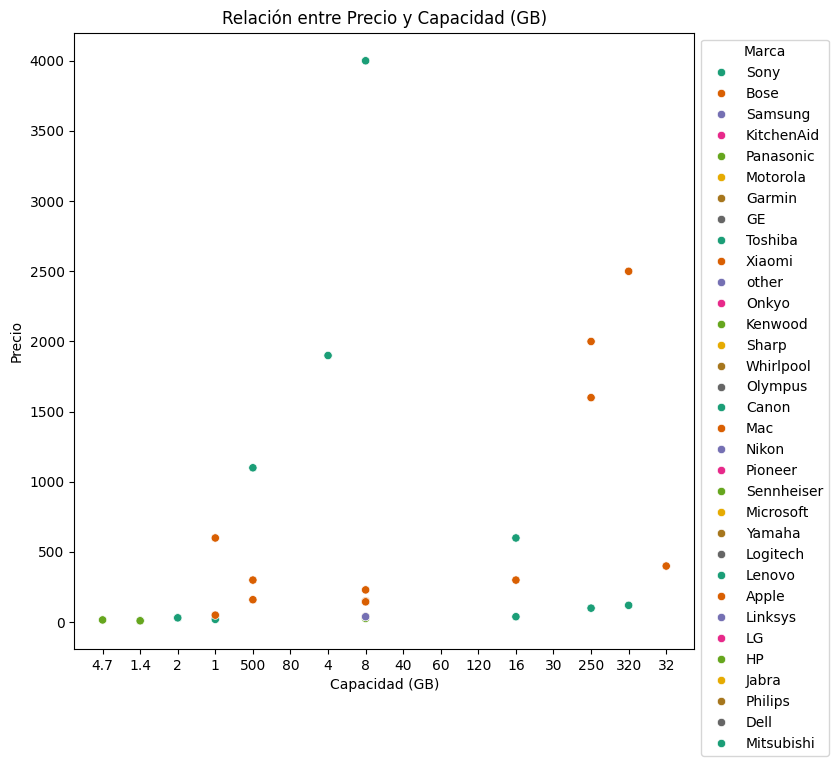

In [39]:
data_gb = data.copy()
data_gb["GB"] = pd.to_numeric(data_gb["GB"], errors='coerce')
# Filtrar los valores no nulos de la columna "precio"
data_gb["GB"].dropna()
plt.figure(figsize=(8, 8))
sns.scatterplot(data=data, x='GB', y='precio', hue='marca', palette='Dark2')
plt.title('Relación entre Precio y Capacidad (GB)')
plt.xlabel('Capacidad (GB)')
plt.ylabel('Precio')
plt.legend(title='Marca', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()
#plt.tight_layout()
#plt.savefig('precio_vs_gb.png')
#plt.close()

7. **Relación entre Precio y Capacidad (GB)**: Para productos con capacidad en GB, el precio tiende a aumentar 
   con capacidades mayores.

## 8. Marcas Más Populares

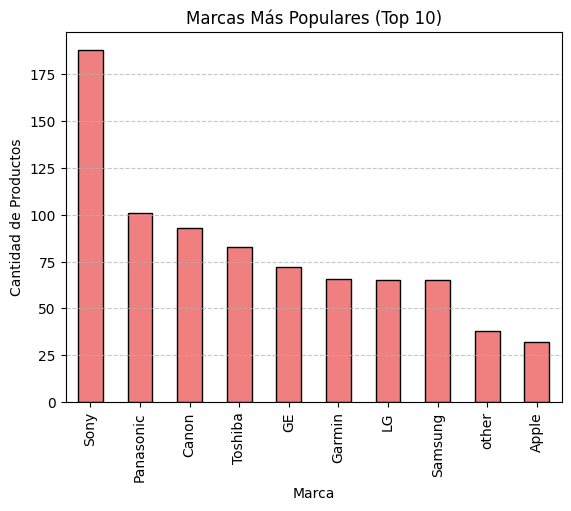

In [40]:
plt.figure()
marcas = data['marca'].dropna()
top_brands = marcas.value_counts().head(10)
top_brands.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Marcas Más Populares (Top 10)')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Productos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#plt.tight_layout()
#plt.savefig('marcas_populares_top_10.png')
#plt.close()

8. **Marcas Más Populares (Top 10)**: 
* Muestra las 10 marcas más representadas en el conjunto de datos en términos de cantidad de productos.
* Este gráfico de barras revela cuáles marcas dominan el inventario, lo que puede ser útil para identificar fabricantes clave

## 9. Precios Promedio por Marca

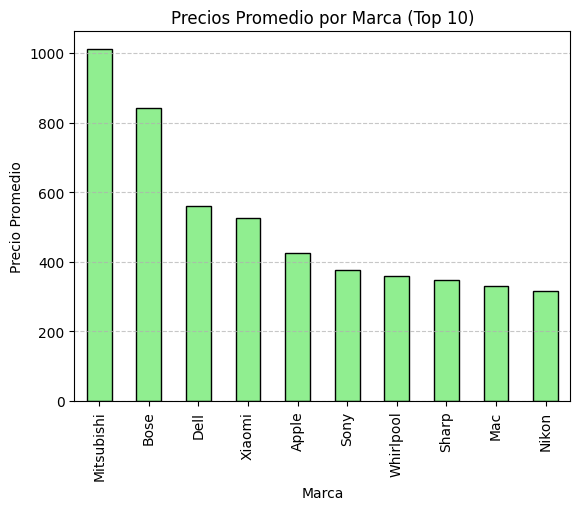

In [41]:
plt.figure()
avg_price = data.groupby('marca')['precio'].mean().sort_values(ascending=False).head(10)
avg_price.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Precios Promedio por Marca (Top 10)')
plt.xlabel('Marca')
plt.ylabel('Precio Promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#plt.tight_layout()
#plt.savefig('precio_promedio_top_10.png')
#plt.close()


9. **Precios Promedio por Marca (Top 10)**: 
* Este gráfico de barras presenta las 10 marcas con los precios promedio más altos.
* Proporciona una idea de las marcas más exclusivas o con productos de mayor costo en promedio.

## 10. Productos por Tipo

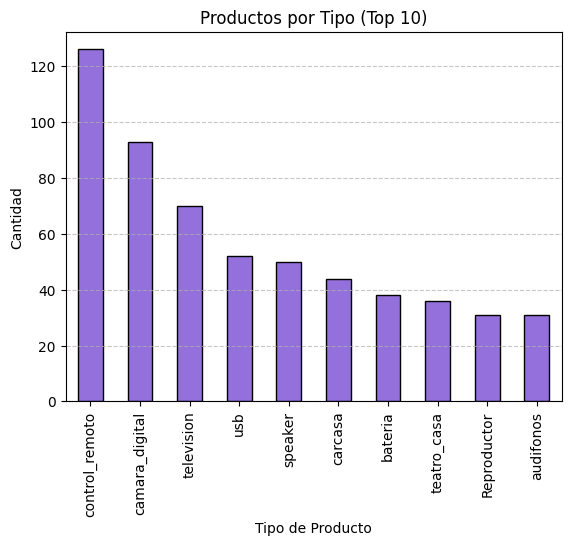

In [42]:
plt.figure()
top_types = data['tipo'].value_counts().head(10)
top_types.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title('Productos por Tipo (Top 10)')
plt.xlabel('Tipo de Producto')
plt.ylabel('Cantidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#plt.tight_layout()
#plt.savefig('productos_por_tipo_top_10.png')
#plt.close()

10. **Productos por Tipo (Top 10)**: 
* Este gráfico muestra la cantidad de productos para las 10 categorías más comunes en el conjunto de datos.
* Es útil para comprender la composición del inventario y las categorías más populares.

## 11. Comparación de Precios entre Tipos de Productos

<Figure size 640x480 with 0 Axes>

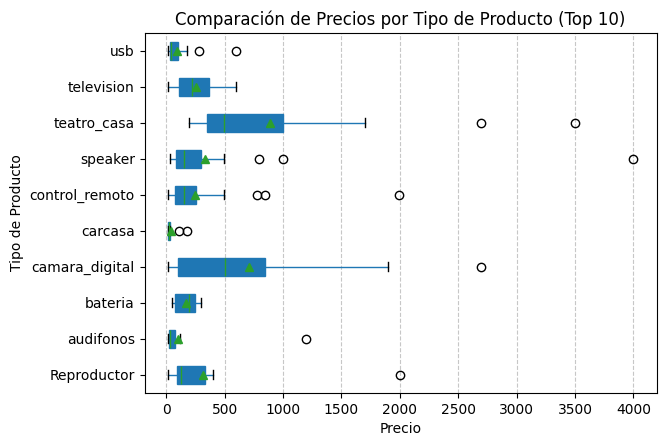

In [43]:
top_types_list = top_types.index.tolist()
filtered_data = data[data['tipo'].isin(top_types_list)]
plt.figure()
filtered_data.boxplot(column='precio', by='tipo', grid=False, vert=False, patch_artist=True, showmeans=True)
plt.title('Comparación de Precios por Tipo de Producto (Top 10)')
plt.xlabel('Precio')
plt.ylabel('Tipo de Producto')
plt.suptitle('')  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
#plt.tight_layout()
#plt.savefig('comparacion_de_precios_tipo_top_10.png')
#plt.close()


11. **Comparación de Precios por Tipo de Producto (Top 10)**: 
* Un gráfico de cajas (boxplot) que compara la distribución de precios para los 10 tipos de producto más representados.
* Este gráfico permite identificar la variación de precios dentro de cada categoría, destacando medianas, rangos y posibles valores atípicos.

# Redes Neuronales

In [44]:
from sklearn.model_selection import train_test_split

# Filtrar datos necesarios
data_nn = data.dropna(subset=['descripcion', 'marca', 'tipo'])

# Columnas de entrada y etiquetas
X = data_nn['descripcion']
y_marca = data_nn['marca']
y_tipo = data_nn['tipo']

# Dividir datos en entrenamiento y validación
X_train, X_val, y_marca_train, y_marca_val, y_tipo_train, y_tipo_val = train_test_split(
    X, y_marca, y_tipo, test_size=0.2, random_state=42
)

In [45]:
from tensorflow.keras.layers import TextVectorization

# Configurar la capa TextVectorization
max_tokens = 10000
max_length = 100
vectorizer = TextVectorization(max_tokens=max_tokens, output_sequence_length=max_length)

# Adaptar al texto de entrenamiento
vectorizer.adapt(X_train)

# Vectorizar las entradas
X_train_vectorized = vectorizer(X_train)
X_val_vectorized = vectorizer(X_val)



In [48]:
# Codificar las etiquetas (marca y tipo) a números
encoder_marca = LabelEncoder()
y_marca_train_encoded = encoder_marca.fit_transform(y_marca_train)
y_marca_val_encoded = encoder_marca.transform(y_marca_val)

encoder_tipo = LabelEncoder()
y_tipo_train_encoded = encoder_tipo.fit_transform(y_tipo_train)
y_tipo_val_encoded = encoder_tipo.transform(y_tipo_val)

# Convertir las etiquetas a tensores
y_marca_train_tensor = tf.convert_to_tensor(y_marca_train_encoded)
y_marca_val_tensor = tf.convert_to_tensor(y_marca_val_encoded)
y_tipo_train_tensor = tf.convert_to_tensor(y_tipo_train_encoded)
y_tipo_val_tensor = tf.convert_to_tensor(y_tipo_val_encoded)


In [47]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

## Creación del modelo*

In [49]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout

# Definir la entrada
input_layer = Input(shape=(max_length,))

# Embedding Layer
embedding_layer = Embedding(input_dim=max_tokens, output_dim=128)(input_layer)

# LSTM Layer
lstm_layer = LSTM(128, return_sequences=False)(embedding_layer)
dropout_layer = Dropout(0.3)(lstm_layer)

# Salidas
marca_output = Dense(len(encoder_marca.classes_), activation='softmax', name='marca_output')(dropout_layer)
tipo_output = Dense(len(encoder_tipo.classes_), activation='softmax', name='tipo_output')(dropout_layer)

# Crear el modelo
model = Model(inputs=input_layer, outputs=[marca_output, tipo_output])

# Compilación
model.compile(
    optimizer='adam',
    loss={'marca_output': 'sparse_categorical_crossentropy', 'tipo_output': 'sparse_categorical_crossentropy'},
    metrics=['accuracy']
)

# Resumen del modelo
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 128)     1280000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 128)          131584      ['embedding[0][0]']              
                                                                                                  
 dropout (Dropout)              (None, 128)          0           ['lstm[0][0]']                   
                                                                                              

## Entrenamiento del modelo

In [ ]:
history = model.fit(
    X_train_vectorized,
    {'marca_output': y_marca_train_tensor, 'tipo_output': y_tipo_train_tensor},
    validation_data=(X_val_vectorized, {'marca_output': y_marca_val_tensor, 'tipo_output': y_tipo_val_tensor}),
    epochs=100,
    batch_size=32
)


Epoch 1/100
19/19 [==============================] - 2s 80ms/step - loss: 5.8788 - marca_output_loss: 3.0104 - tipo_output_loss: 2.8683 - marca_output_accuracy: 0.1814 - tipo_output_accuracy: 0.1661 - val_loss: 5.7690 - val_marca_output_loss: 2.9803 - val_tipo_output_loss: 2.7887 - val_marca_output_accuracy: 0.2027 - val_tipo_output_accuracy: 0.2162
Epoch 2/100
19/19 [==============================] - 2s 82ms/step - loss: 5.8669 - marca_output_loss: 3.0074 - tipo_output_loss: 2.8595 - marca_output_accuracy: 0.1746 - tipo_output_accuracy: 0.1475 - val_loss: 5.7684 - val_marca_output_loss: 2.9782 - val_tipo_output_loss: 2.7902 - val_marca_output_accuracy: 0.2027 - val_tipo_output_accuracy: 0.2162
Epoch 3/100
19/19 [==============================] - 1s 75ms/step - loss: 5.8566 - marca_output_loss: 3.0045 - tipo_output_loss: 2.8521 - marca_output_accuracy: 0.1814 - tipo_output_accuracy: 0.1508 - val_loss: 5.7614 - val_marca_output_loss: 2.9725 - val_tipo_output_loss: 2.7890 - val_marca_out

## Evaluacion 

In [53]:
# Evaluar el modelo en el conjunto de validación
results = model.evaluate(
    X_val_vectorized,
    {'marca_output': y_marca_val_tensor, 'tipo_output': y_tipo_val_tensor}
)

# Mostrar resultados
print(f"Pérdida Total: {results[0]:.4f}")
print(f"Pérdida Marca: {results[1]:.4f}, Precisión Marca: {results[3]:.2f}")
print(f"Pérdida Tipo: {results[2]:.4f}, Precisión Tipo: {results[4]:.2f}")



5/5 [==============================] - 0s 20ms/step - loss: 5.7544 - marca_output_loss: 2.9738 - tipo_output_loss: 2.7806 - marca_output_accuracy: 0.2027 - tipo_output_accuracy: 0.2162
Pérdida Total: 5.7544
Pérdida Marca: 2.9738, Precisión Marca: 0.20
Pérdida Tipo: 2.7806, Precisión Tipo: 0.22


##  Prediccion

In [52]:
# Nuevas descripciones para predicción
nuevas_descripciones = [
    "Sony Smart TV with 4K resolution",
    "Panasonic High-Speed Blender"
]

# Vectorizar nuevas descripciones
nuevas_secuencias = vectorizer(nuevas_descripciones)

# Realizar predicciones
marca_preds, tipo_preds = model.predict(nuevas_secuencias)

# Decodificar las predicciones
marca_pred_labels = encoder_marca.inverse_transform(tf.argmax(marca_preds, axis=1).numpy())
tipo_pred_labels = encoder_tipo.inverse_transform(tf.argmax(tipo_preds, axis=1).numpy())

# Mostrar los resultados
for desc, marca, tipo in zip(nuevas_descripciones, marca_pred_labels, tipo_pred_labels):
    print(f"Descripción: {desc}\nPredicción - Marca: {marca}, Tipo: {tipo}\n")


1/1 [==============================] - 0s 463ms/step
Descripción: Sony Smart TV with 4K resolution
Predicción - Marca: Sony, Tipo: control_remoto

Descripción: Panasonic High-Speed Blender
Predicción - Marca: Sony, Tipo: control_remoto

